In [1]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.2/318.2 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s 

In [2]:
import gradio as gr

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section

In [5]:
import pathlib
data_dir = "/content/drive/MyDrive/violence_dataset1/new_violence/"
#data_dir = tf.keras.utils.get_file('new_violence', origin=dataset_url, untar=True)
#data_dir = pathlib.Path(data_dir)

In [6]:
print(data_dir)

/content/drive/MyDrive/violence_dataset1/new_violence/


In [7]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=100,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11083 files belonging to 2 classes.
Using 8867 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=200,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11083 files belonging to 2 classes.
Using 2216 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['non_violence', 'violence']


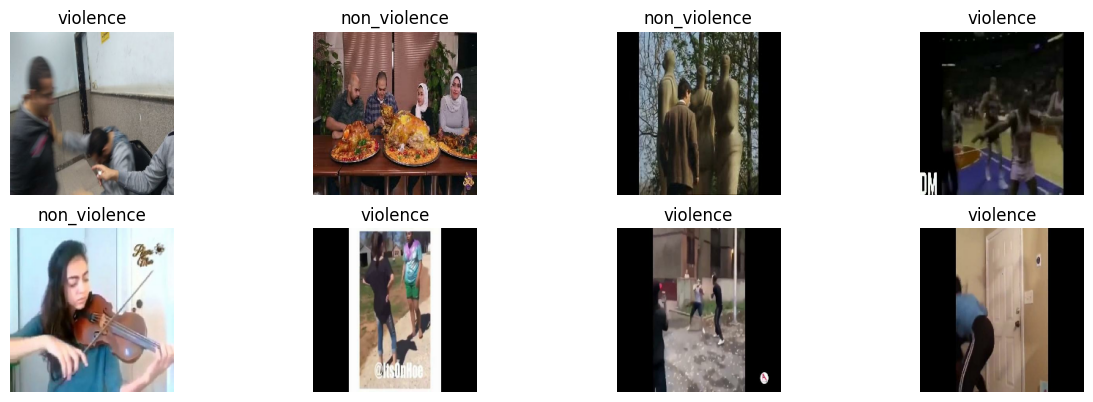

In [10]:
plt.figure(figsize=(15, 20))
for images, labels in train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

94765736/94765736 [==============================] - 1s 0us/step


In [12]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrap  (None, 2048)              0         
 per)                                                            
                                                                 
 module_wrapper_1 (ModuleWr  (None, 512)               1049088   
 apper)                                                          
                                                                 
 module_wrapper_2 (ModuleWr  (None, 2)                 1026      
 apper)                                                          
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
__________

In [13]:
#from tensorflow.keras.losses import categorical_crossentropy

In [14]:
#resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
resnet_model.compile(optimizer='adam',
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                     metrics=['accuracy'])

In [ ]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
278/278 [==============================] - 2294s 8s/step - loss: 0.2752 - accuracy: 0.9041 - val_loss: 0.1419 - val_accuracy: 0.9463
Epoch 2/10
 59/278 [=====>........................] - ETA: 23:08 - loss: 0.1512 - accuracy: 0.9428

In [ ]:
print(history.history['accuracy'])

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#data_dir = Path(data_dir)
#violence = list(data_dir.glob('violence/*'))
#print(violence[0])
PIL.Image.open('/content/drive/MyDrive/violence/2.jpg')
#PIL.Image.open('/content/drive/MyDrive/violence_dataset1/new_violence/non_violence/2.jpg')

In [ ]:
import cv2
image=cv2.imread('/content/drive/MyDrive/violence/2.jpg')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


In [ ]:
pred=resnet_model.predict(image)
print(pred)

In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)


In [ ]:
#def predict_image(img):
  #img_4d=img.reshape(-1,224,224,3)
  #prediction=resnet_model.predict(img_4d)[0]
  #return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
def predict_image(img):
  img_4d=cv2.resize(img, (img_height,img_width))
  img_4d=np.expand_dims(img_4d,axis=0)
  prediction=resnet_model.predict(img_4d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(2)}

In [ ]:
!pip install gradio

In [ ]:
#import gradio as gr
#image = gr.inputs.Image()
#label = gr.outputs.Label(num_top_classes=2)
#inputs = gr.components.Image()
#outputs = gr.components.Label(num_top_classes=2)

#gr.Interface(fn=predict_image, inputs=inputs, outputs=outputs).launch(debug='True')

In [ ]:
import gradio as gr
import tensorflow as tf
import numpy as np
import requests
image_input = gr.components.Image()
label = gr.components.Label(num_top_classes=2)

sample_images = [
    ['/content/drive/MyDrive/violence/2.jpg'],
    ['/content/drive/MyDrive/violence/3.jpg'],
    ['/content/drive/MyDrive/violence/4.jpg'],
    ['/content/drive/MyDrive/violence/5.jpg'],
    ['/content/drive/MyDrive/violence/6.jpg']
]

gr.Interface(predict_image,image_input,label,title='violence',description='will this work?',examples=sample_images).launch();